In [1]:
import cv2
import numpy as np
import pprint
from pathlib import Path
from matplotlib import pyplot as plt
from src.cap_aug import CAP_AUG, CAP_AUG_Multiclass
from src.utils import show_image, draw_bboxes

# Load data

## Load destination image

In [2]:
DEST_DATASET_ROOT = Path('/dataset/kitti_format/vbd/png_keep_ratio/train/')

In [3]:
dest_image_name = '7ffe83778375bb8229b12c2ad4570c0e.png'

dest_image_name = DEST_DATASET_ROOT / dest_image_name
image = cv2.imread(str(dest_image_name))

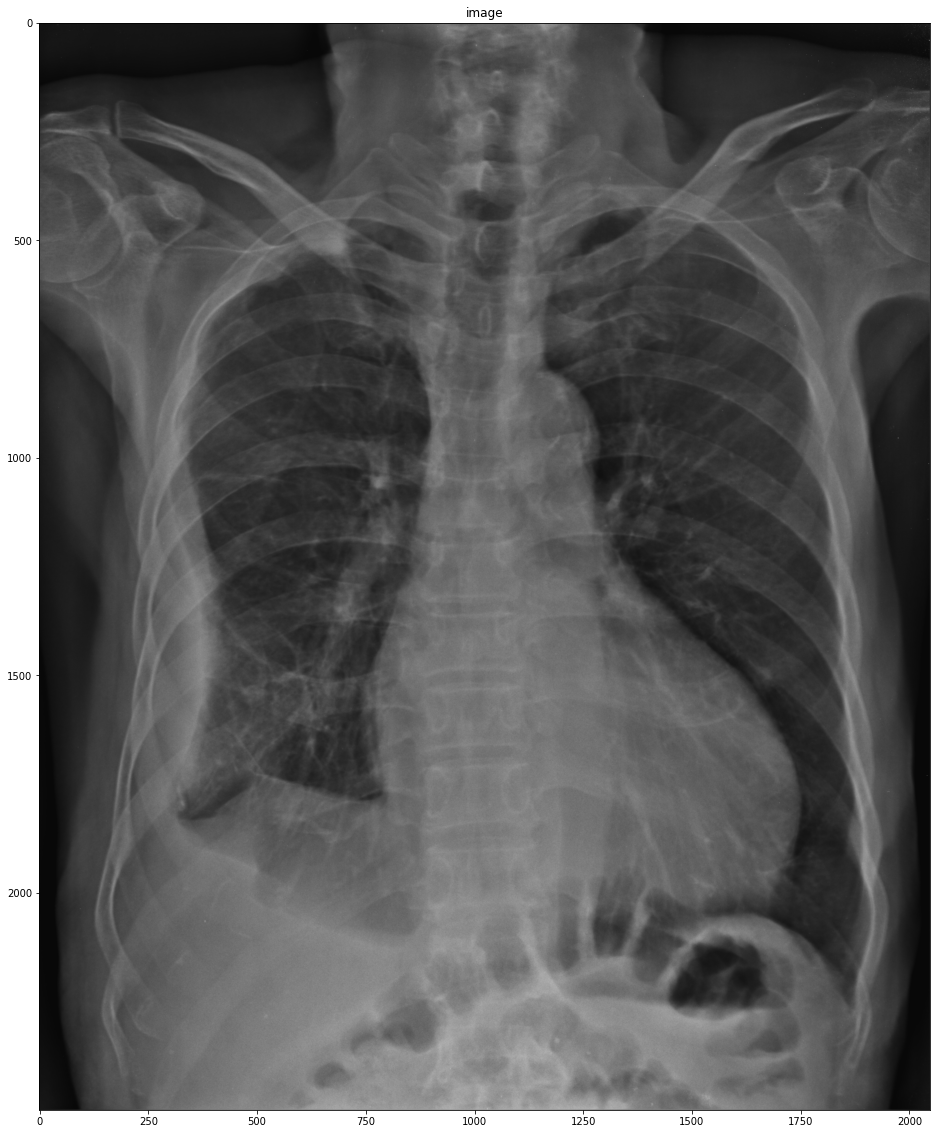

In [4]:
show_image(image)

## Get list of source images

In [5]:
class_idx = 0

In [6]:
CLASS_DATASET_ROOT = Path(f'/root/workdir/vbd/CAP_augmentation/data/vinbig_dataset/{class_idx}/')
SOURCE_IMAGES = sorted(list(CLASS_DATASET_ROOT.glob('*.png')))

In [7]:
prob_map_path = f'/root/workdir/vbd/CAP_augmentation/data/vinbig_dataset/analytics/{class_idx}.npy'
prob_map = np.load(prob_map_path,allow_pickle='TRUE').item()

## Example in pixel coordinates

Note : If bev_transform parameter is None, then x_range and y_range must be a list of integers and these parameters will mean range in x and y axis in the image coordinate system. h_range parameter also must be a list of interegers (pixel sizes of images)

In [8]:
cap_aug_pixels = CAP_AUG(SOURCE_IMAGES,  bev_transform=None,
                                         probability_map=prob_map['probability_map'],
                                         mean_h_norm=prob_map['mean_h'],
                                         histogram_matching=True,
                                         n_objects_range=[5,10], 
                                         blending_coeff=0.5)

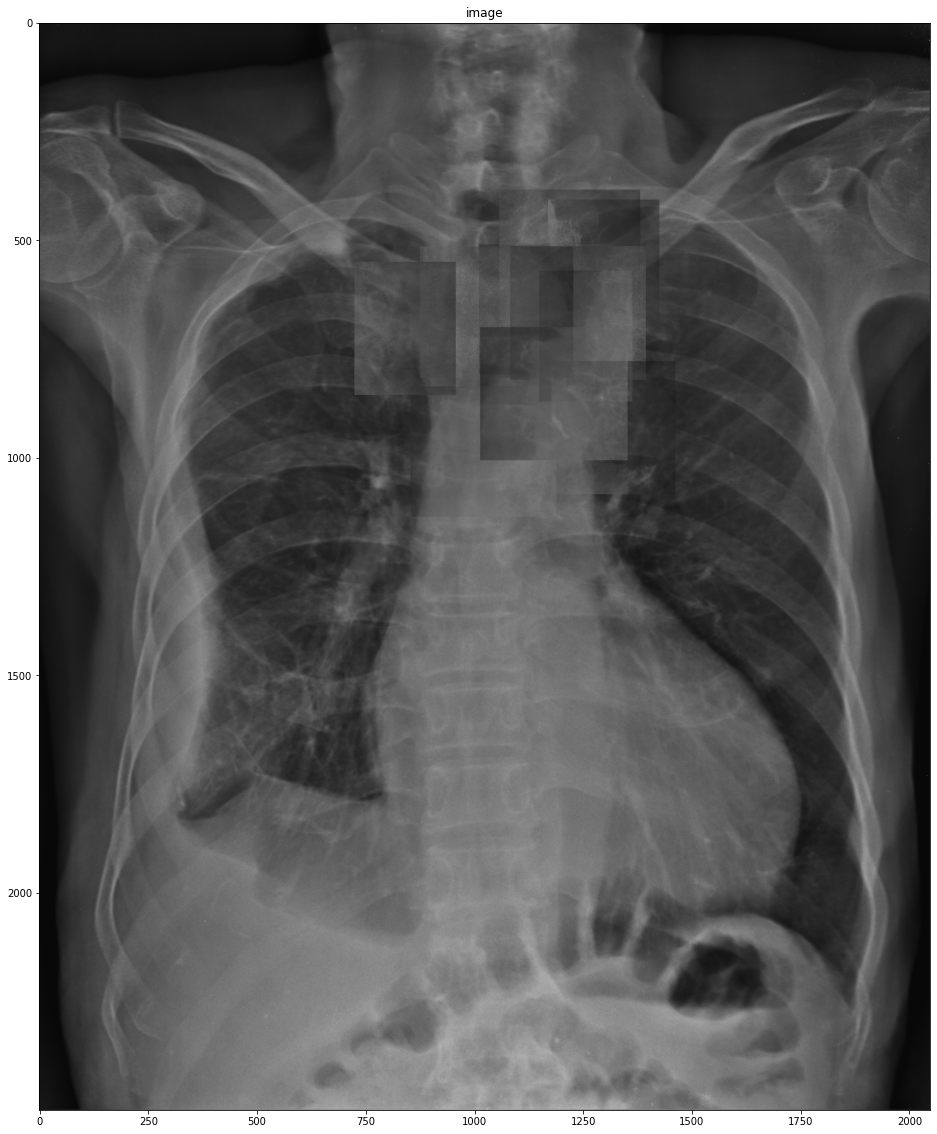

In [9]:
result_image, result_coords, semantic_mask, instance_mask = cap_aug_pixels(image)
show_image(result_image)

In [10]:
result_coords

array([[1011,  511, 1343,  810],
       [ 854,  837, 1189, 1137],
       [1058,  385, 1382,  685],
       [1170,  408, 1426,  707],
       [1083,  515, 1395,  822],
       [1150,  571, 1364,  872],
       [ 876,  516, 1228,  817],
       [1178,  779, 1463, 1085],
       [ 725,  551,  958,  857],
       [1014,  701, 1353, 1007]])

### Draw bounding boxes

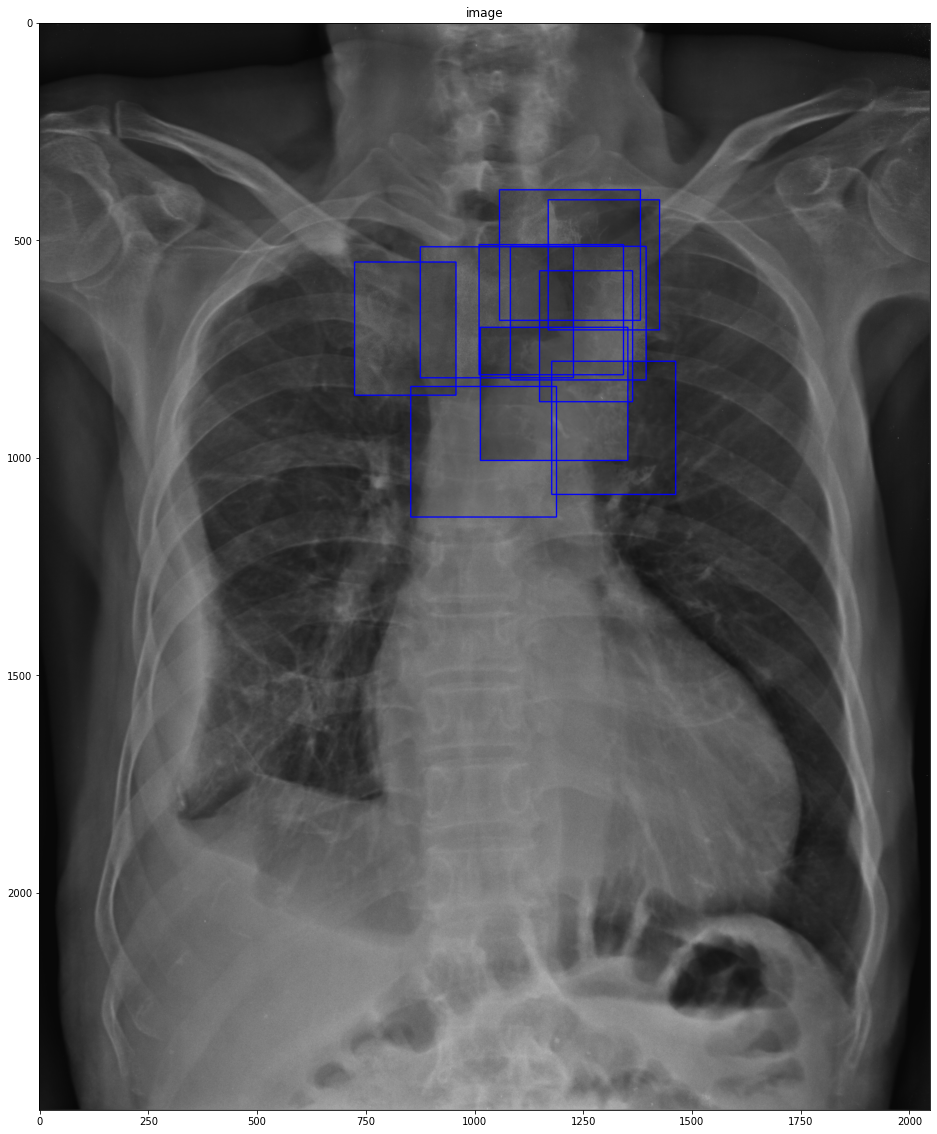

In [11]:
result_image_vis, result_mask = draw_bboxes(result_image, result_coords)
show_image(result_image_vis)

# Test multiclass

In [1]:
import cv2
import numpy as np
import pprint
from pathlib import Path
from matplotlib import pyplot as plt
from src.cap_aug import CAP_AUG, CAP_AUG_Multiclass
from src.utils import show_image, draw_bboxes

In [2]:
DEST_DATASET_ROOT = Path('/dataset/kitti_format/vbd/png_keep_ratio/train/')
dest_image_name = '7ffe83778375bb8229b12c2ad4570c0e.png'

dest_image_name = DEST_DATASET_ROOT / dest_image_name
image = cv2.imread(str(dest_image_name))

In [3]:
class_idxs = [0,3,11]
probabilities = [0.9,0.9,0.9]
cap_augs = []

for class_idx in class_idxs:
    CLASS_DATASET_ROOT = Path(f'/root/workdir/vbd/CAP_augmentation/data/vinbig_dataset/{class_idx}/')
    SOURCE_IMAGES = sorted(list(CLASS_DATASET_ROOT.glob('*.png')))

    prob_map_path = f'/root/workdir/vbd/CAP_augmentation/data/vinbig_dataset/analytics/{class_idx}.npy'
    prob_map = np.load(prob_map_path,allow_pickle='TRUE').item()
    
    cap_aug_pixels = CAP_AUG(SOURCE_IMAGES,  bev_transform=None,
                                         probability_map=prob_map['probability_map'],
                                         mean_h_norm=prob_map['mean_h'],
                                         histogram_matching=True,
                                         random_h_flip=True,
                                         random_v_flip=True,
                                         n_objects_range=[1,3], 
                                         blending_coeff=0.6)
    cap_augs.append(cap_aug_pixels)

In [4]:
cap_aug_multiclass = CAP_AUG_Multiclass(cap_augs, probabilities, class_idxs)

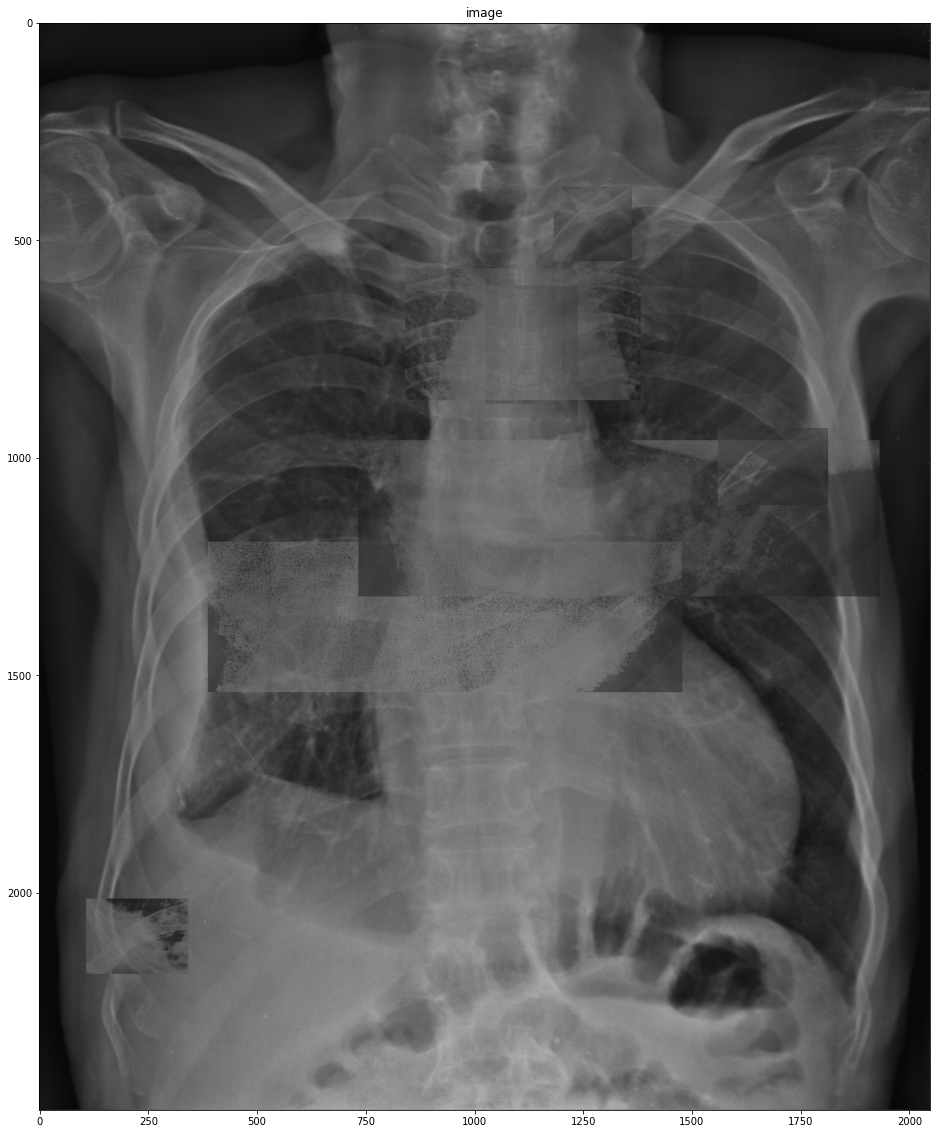

In [5]:
result_image, result_coords, semantic_mask, instance_mask = cap_aug_multiclass(image)
show_image(result_image)

In [6]:
result_coords

array([[   0, 1026,  578, 1202,  877],
       [   0,  919,  606, 1239,  910],
       [   0,  842,  566, 1383,  869],
       [   3,  388, 1194, 1479, 1540],
       [   3,  734,  961, 1932, 1320],
       [  11, 1183,  378, 1363,  550],
       [  11, 1560,  933, 1814, 1110],
       [  11,  108, 2014,  343, 2187]])

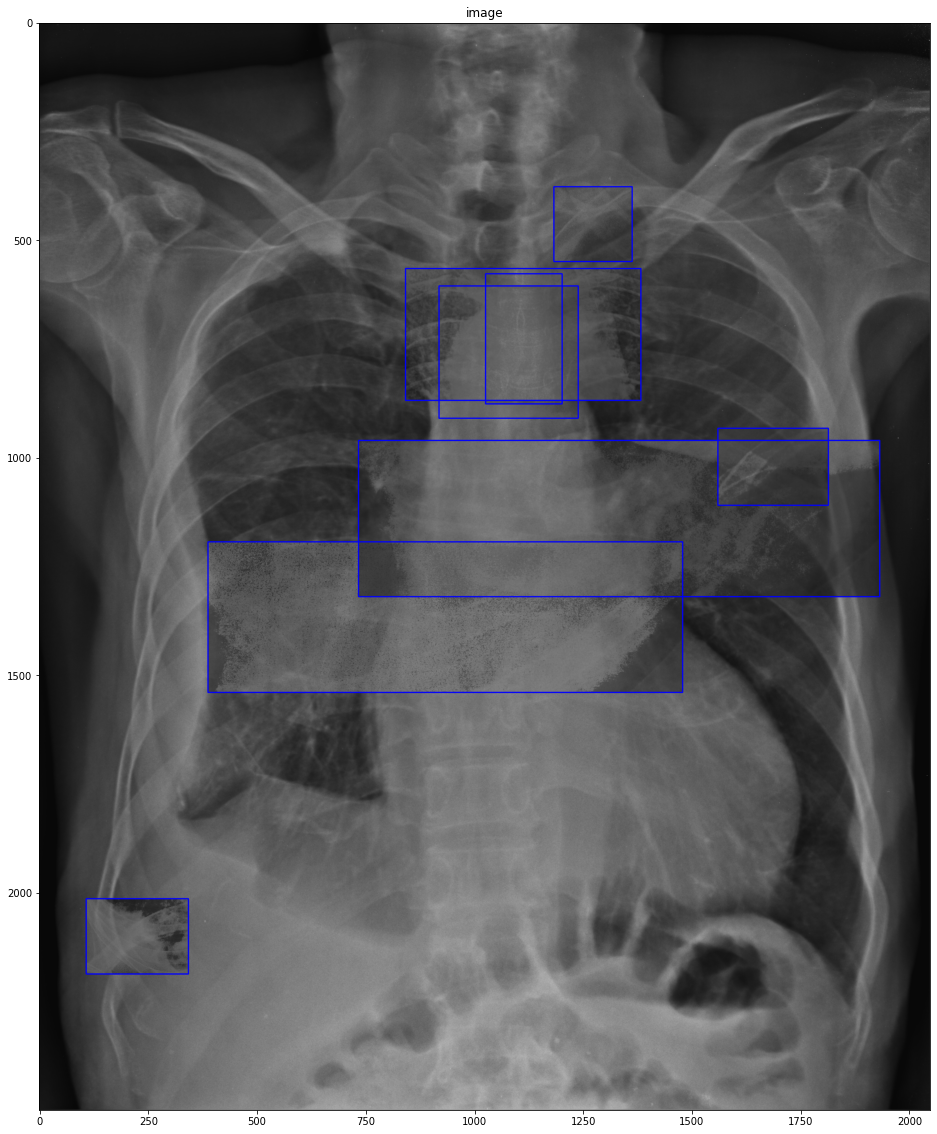

In [7]:
result_image_vis, result_mask = draw_bboxes(result_image, result_coords)
show_image(result_image_vis)